# Exercise 4B

In this exercise, you will learn how to use PCA for dimensionality reduction to visualize clusters and then run a clustering algorithm.

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [5]:
from sklearn.datasets import load_breast_cancer
df = load_breast_cancer(as_frame=True).frame

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
X = df.drop('target', axis=1)

1. Perform scaling `(10 pts)`

In [10]:
from sklearn.datasets import load_breast_cancer
df = load_breast_cancer(as_frame=True).frame
X = df.drop('target', axis=1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

2. Perform dimensionality reduction using PCA `(10 pts)`

In [11]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

3. Get the total explained variance `(5 pts)`

In [12]:
total_explained_variance = np.sum(pca.explained_variance_ratio_)
print(f"Total explained variance: {total_explained_variance:.4f}")

Total explained variance: 1.0000


4. Plot the explained variances of each principal component `(5 pts)`

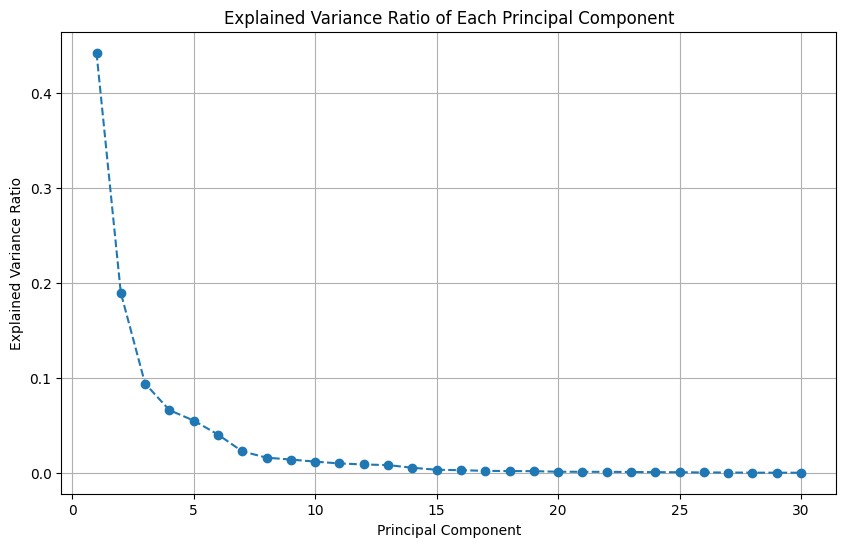

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Explained Variance Ratio of Each Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

5. Visualize the dataset after PCA using a scatter plot `(5 pts)`

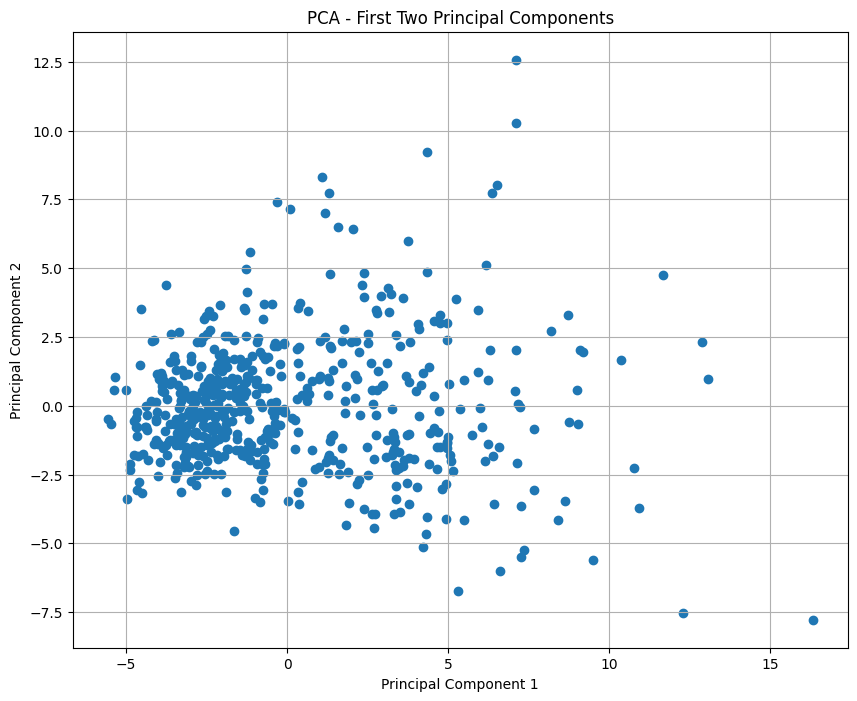

In [14]:
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - First Two Principal Components')
plt.grid(True)
plt.show()

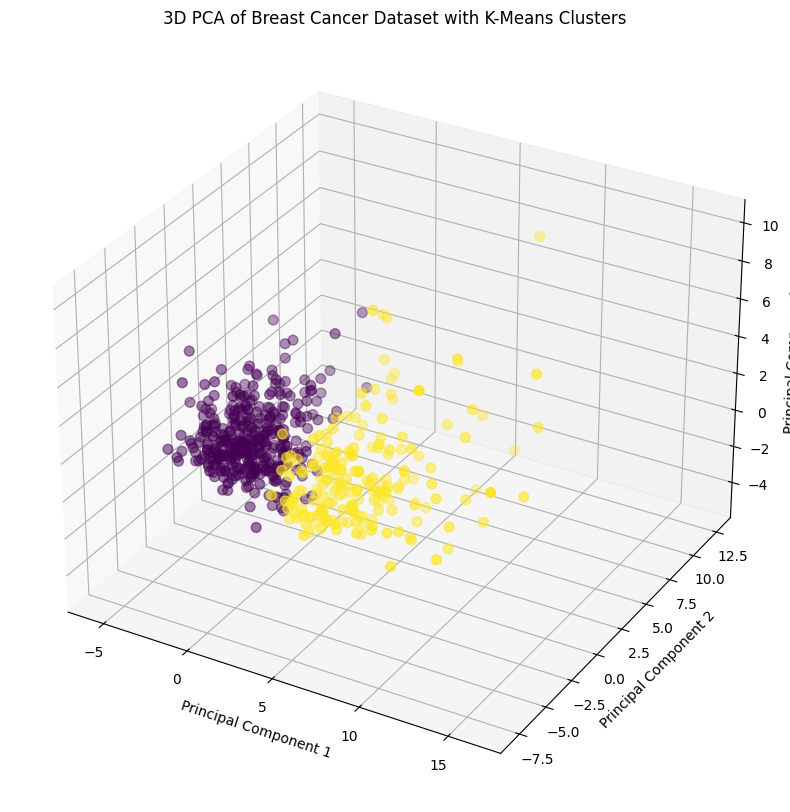

In [20]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the first three principal components
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=clusters, cmap='viridis', s=50)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA of Breast Cancer Dataset with K-Means Clusters')

plt.show()

In [21]:
import plotly.express as px

fig = px.scatter_3d(df_plot, x='PC1', y='PC2', z='PC3', color='Cluster', title='3D PCA with K-Means Clusters')
fig.show()

6. Perform clustering using any clustering algorithm `(10 pts)`

In [15]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10) # Using 2 clusters for breast cancer dataset
clusters = kmeans.fit_predict(X_pca)

7. View the loading scores of each principal component `(5 pts)`

In [16]:
loading_scores = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=X.columns)
print("Loading Scores (Principal Components):")
print(loading_scores)

Loading Scores (Principal Components):
                              PC1       PC2       PC3       PC4       PC5  \
mean radius              0.218902 -0.233857 -0.008531 -0.041409 -0.037786   
mean texture             0.103725 -0.059706  0.064550  0.603050  0.049469   
mean perimeter           0.227537 -0.215181 -0.009314 -0.041983 -0.037375   
mean area                0.220995 -0.231077  0.028700 -0.053434 -0.010331   
mean smoothness          0.142590  0.186113 -0.104292 -0.159383  0.365089   
mean compactness         0.239285  0.151892 -0.074092 -0.031795 -0.011704   
mean concavity           0.258400  0.060165  0.002734 -0.019123 -0.086375   
mean concave points      0.260854 -0.034768 -0.025564 -0.065336  0.043861   
mean symmetry            0.138167  0.190349 -0.040240 -0.067125  0.305941   
mean fractal dimension   0.064363  0.366575 -0.022574 -0.048587  0.044424   
radius error             0.205979 -0.105552  0.268481 -0.097941  0.154456   
texture error            0.017428  0.

In [18]:
df_plot = pd.DataFrame(X_pca[:, :3], columns=['PC1', 'PC2', 'PC3'])
df_plot['Cluster'] = clusters
print(df_plot.head())

        PC1        PC2       PC3  Cluster
0  9.192837   1.948583 -1.123166        1
1  2.387802  -3.768172 -0.529293        1
2  5.733896  -1.075174 -0.551748        1
3  7.122953  10.275589 -3.232790        1
4  3.935302  -1.948072  1.389767        1
